In [1]:
import networkx as nx

In [4]:
H = nx.read_gml("polblogs.gml")

In [13]:
H2 = nx.Graph(H)
H3 = nx.to_undirected(H2)
    

In [21]:
for node in H3.nodes:
    print(node)
    for neighbor in H3[node]:
        print ("\t" + neighbor)
    break

100monkeystyping.com
	rudepundit.blogspot.com
	townhall.com/clog
	tbogg.blogspot.com
	americablog.blogspot.com
	powerlineblog.com
	oliverwillis.com
	mydd.com
	talkleft.com
	lightupthedarkness.org
	blogforamerica.com
	dailykos.com
	juancole.com
	atrios.blogspot.com
	theleftcoaster.com
	talkingpointsmemo.com
	12thharmonic.com/wordpress
	althippo.blogspot.com
	beastsbelly.blogspot.com
	burntorangereport.com
	dogfight04.typepad.com
	goose3five.blogspot.com
	hereswhatsleft.typepad.com
	hereswhatsleft.typepad.com/home
	peacegarden.blogspot.com
	robschumacher.blogspot.com
	markheimonen.blogspot.com


In [20]:
H3[node]

AtlasView({'rudepundit.blogspot.com': {}, 'townhall.com/clog': {}, 'tbogg.blogspot.com': {}, 'americablog.blogspot.com': {}, 'powerlineblog.com': {}, 'oliverwillis.com': {}, 'mydd.com': {}, 'talkleft.com': {}, 'lightupthedarkness.org': {}, 'blogforamerica.com': {}, 'dailykos.com': {}, 'juancole.com': {}, 'atrios.blogspot.com': {}, 'theleftcoaster.com': {}, 'talkingpointsmemo.com': {}, '12thharmonic.com/wordpress': {}, 'althippo.blogspot.com': {}, 'beastsbelly.blogspot.com': {}, 'burntorangereport.com': {}, 'dogfight04.typepad.com': {}, 'goose3five.blogspot.com': {}, 'hereswhatsleft.typepad.com': {}, 'hereswhatsleft.typepad.com/home': {}, 'peacegarden.blogspot.com': {}, 'robschumacher.blogspot.com': {}, 'markheimonen.blogspot.com': {}})

# Applying my model

In [22]:
import pandas as pd
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt
import netwulf as nw
from scipy.optimize import minimize

In [23]:
def bound(num, upper=1, lower = 0):
    return min(max(num, lower), 1)

def create_func_2param(params):
    return lambda x,y: bound(sum([params[i]*x**i for i in range(len(params))])*sum([params[i]*y**i for i in range(len(params))]))

def create_func_1param(params):
    return lambda x: bound(sum([params[i]*x**i for i in range(len(params))]))

In [84]:
#labels is a column numpy array
def t_matrix_func1(labels, params=[0]):
    return labels @ labels.T + params[0]
def t_matrix_func2(labels, params=[0,1]):
    return labels @ labels.T*params[1] + params[0]
def t_matrix_func3(labels, params=[0,1, 1]):
    return (labels @ labels.T)**2*params[2]+ labels @ labels.T*params[1] + params[0]

In [97]:
def log_likelihood(G, G_c, labels, params, transition_func):
    n = len(labels)
    vec = np.zeros(n).reshape(-1, 1)
    labels = np.array(labels).reshape(-1,1)
    #for i in range(len(params)):
    #    vec += labels**i*params[i]
    transition_predictions = transition_func(labels, params)
    transition_predictions = np.clip(transition_predictions, .0001, .9999)
    prod = transition_predictions*G + (1-transition_predictions)*G_c
    log_matrix = np.log(prod + np.identity(n))
    return np.sum(log_matrix)/(n*(n-1))

def find_opt_params(g, transition_func, num_params = 1):
    labels = len(g.nodes)
    G_c = nx.to_numpy_array(nx.complement(g))
    G = nx.to_numpy_array(g)
    func = lambda x: -log_likelihood(G,G_c, x[:-num_params], x[-num_params:], transition_func)
    bounds = [(0,1) for i in range(labels)] + [(None, None) for i in range(1)]
    res = minimize(func, list(np.random.rand(labels + num_params)),
                    method='Nelder-Mead', options={'maxiter': 100, 'disp': True, 'adaptive':True})
    return res.x

In [86]:
def prob_matrix(labels, params, transition_func):
    n = len(labels)
    vec = np.zeros(n).reshape(-1, 1)
    labels = np.array(labels).reshape(-1,1)
    #for i in range(len(params)):
    #    vec += labels**i*params[i]
    transition_predictions = transition_func(labels,params)
    transition_predictions = np.clip(transition_predictions, .0001, .999)
    return transition_predictions

In [87]:
G = nx.read_gml("polblogs.gml")
G = nx.Graph(G)
G = nx.to_undirected(G)

In [98]:
l = find_opt_params(G,t_matrix_func1, num_params=1)
np.round(probability_matrix(l[:-2], l[-2:]))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [99]:
probability_matrix(l[:-1], l[-1:])

array([[0.13003588, 0.13003588, 0.13003588, ..., 0.13003588, 0.13003588,
        0.13003588],
       [0.13003588, 0.13003588, 0.13003588, ..., 0.13003588, 0.13003588,
        0.13003588],
       [0.13003588, 0.13003588, 0.13003588, ..., 0.13003588, 0.13003588,
        0.13003588],
       ...,
       [0.13003588, 0.13003588, 0.13003588, ..., 0.13003588, 0.13003588,
        0.13003588],
       [0.13003588, 0.13003588, 0.13003588, ..., 0.13003588, 0.13003588,
        0.13003588],
       [0.13003588, 0.13003588, 0.13003588, ..., 0.13003588, 0.13003588,
        0.13003588]])

(array([140., 162., 137., 153., 143., 163., 158., 141., 141., 152.]),
 array([1.68516912e-05, 1.00015046e-01, 2.00013240e-01, 3.00011434e-01,
        4.00009628e-01, 5.00007822e-01, 6.00006016e-01, 7.00004211e-01,
        8.00002405e-01, 9.00000599e-01, 9.99998793e-01]),
 <BarContainer object of 10 artists>)

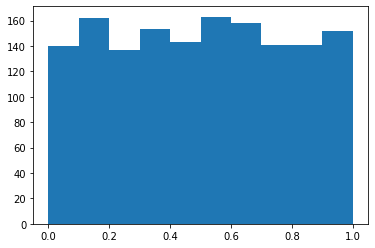

In [100]:
plt.hist(l[:-1])

In [70]:
np.shape(G_mat)

(1490, 1490)

In [44]:
labels = len(G.nodes)
G_c = nx.to_numpy_array(nx.complement(G))
G_ = nx.to_numpy_array(G)

In [47]:
log_likelihood_optimized(G_, G_c, list(np.random.rand(labels)), list(np.random.rand(2)))

-2.6675729942954103

In [54]:
log_likelihood_optimized(G_, G_c, list(np.random.rand(labels)), list(np.random.rand(2)))

-0.3475921603989062

In [75]:
-log_likelihood_optimized(G_, G_c, l[:-2], l[2:])

log_like


3.4064064754916163